In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, regularizers,models
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2  
import numpy as np
import os

path_0 = './0_round'
path_1 = './1_square'
path_2 = './2_heart'
path_3 = './3_long'
path_4 = './4_oval'
path_5 = './5_triangle'

In [18]:
features, labels = [], []
#===========================================讀取第0項分類
for file_name in os.listdir(path_0):
    if file_name.endswith('.jpg'):
        img_path = os.path.join(path_0, file_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (150, 150))
            features.append(img)
            labels.append(0)  # Use 0 for round face
            img = img/255.0

#===========================================讀取第1項分類
for file_name in os.listdir(path_1):
    if file_name.endswith('.jpg'):
        img_path = os.path.join(path_1, file_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (150, 150))
            features.append(img)
            labels.append(1)  # Use 1 for square face
            img = img/255.0

#===========================================讀取第2項分類
for file_name in os.listdir(path_2):
    if file_name.endswith('.jpg'):
        img_path = os.path.join(path_2, file_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (150, 150))
            features.append(img)
            labels.append(2)  # Use 2 for heart face
            img = img/255.0

#===========================================讀取第3項分類
for file_name in os.listdir(path_3):
    if file_name.endswith('.jpg'):
        img_path = os.path.join(path_3, file_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (150, 150))
            features.append(img)
            labels.append(3)  # Use 3 for long face
            img = img/255.0

#===========================================讀取第4項分類
for file_name in os.listdir(path_4):
    if file_name.endswith('.jpg'):
        img_path = os.path.join(path_4, file_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (150, 150))
            features.append(img)
            labels.append(4)  # Use 4 for oval face
            img = img/255.0

#===========================================讀取第5項分類
for file_name in os.listdir(path_5):
    if file_name.endswith('.jpg'):
        img_path = os.path.join(path_5, file_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (150, 150))
            features.append(img)
            labels.append(5)  # Use 5 for triangle face
            img = img/255.0

#======================================================
# Convert lists to numpy arrays and normalize the images
features = np.asarray(features, np.float32) / 255.0
labels = np.asarray(labels, np.int32)

# Reshape images to match the input shape of the neural network 4d
train_images = features.reshape((-1, 150, 150, 1))
train_labels = labels

#===========================train_test_split

x_train, x_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=6)

# y label One-hot encode
y_train = to_categorical(y_train, num_classes=6)
y_val = to_categorical(y_val, num_classes=6)

print(x_train.shape)
print(y_train.shape)
print(train_labels)


(241, 150, 150, 1)
(241, 6)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5]


In [10]:
#make an ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

batch_size = 32
train_generator = datagen.flow(x_train, y_train, batch_size=batch_size)

In [11]:
## build CNN model

model = tf.keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((3, 3)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(6, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 148, 148, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 76832)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     4,917,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,918,022 (18.76 MB)

 Trainable params: 4,918,022 (18.76 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# 假设你有一个类别标签数组 train_labels，例如 [0, 1, 1, 2, 0, 1, ...]

# 计算类别权重
class_weights = compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)

# 打印类别权重
print("Class Weights:", class_weights)

class_weights_dict = dict(enumerate(class_weights))


Class Weights: [1.07092199 1.0942029  0.9869281  1.29059829 0.52982456 2.09722222]


In [23]:
train_history=model.fit(
    x=train_images,
    y=to_categorical(train_labels),
    validation_split=0.2,
    epochs=20,
    batch_size=5,
    class_weight=class_weights_dict
)
# 使用增強數據生成器進行訓練
# model.fit(train_generator,
#           steps_per_epoch=len(x_train) // batch_size,
#           epochs=20,
#           validation_data=(x_val, y_val))

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.1660 - loss: 4.0311 - val_accuracy: 0.0000e+00 - val_loss: 2.2632
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.2036 - loss: 1.7276 - val_accuracy: 0.0000e+00 - val_loss: 2.3993
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.1798 - loss: 1.6983 - val_accuracy: 0.0000e+00 - val_loss: 2.6612
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.1900 - loss: 1.7146 - val_accuracy: 0.0000e+00 - val_loss: 2.6082
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.2134 - loss: 1.6706 - val_accuracy: 0.0000e+00 - val_loss: 2.9693
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.2097 - loss: 1.6207 - val_accuracy: 0.0000e+00 - val_loss: 3.0665
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.2329 - loss: 1.6458 - val_accuracy: 0.0000e+00 - val_loss: 2.8857
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.2312 - loss: 1.582

#k-fold
from sklearn.model_selection import KFold
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# 对标签进行One-hot编码
train_labels = to_categorical(train_labels, num_classes=6)

# 数据增广
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# K折交叉验证
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold = 1
val_accuracies = []

for train_index, val_index in kf.split(train_images):
    x_train, x_val = train_images[train_index], train_images[val_index]
    y_train, y_val = train_labels[train_index], train_labels[val_index]

    # 创建模型
    model = models.Sequential()
    model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 1)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(6, activation='softmax'))
    
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    # 回调函数
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
    
    # 生成训练数据
    batch_size = 2
    train_generator = datagen.flow(x_train, y_train, batch_size=batch_size)
    
    # 训练模型
    history = model.fit(train_generator,
                        steps_per_epoch=len(x_train) // batch_size,
                        epochs=20,
                        validation_data=(x_val, y_val),
                        callbacks=[early_stopping, reduce_lr])
    
    # 记录验证准确率
    val_accuracy = history.history['val_accuracy'][-1]
    val_accuracies.append(val_accuracy)
    
    print(f'Fold {fold}, Validation Accuracy: {val_accuracy}')
    fold += 1

# 输出平均验证准确率
print(f'Average Validation Accuracy: {np.mean(val_accuracies)}')


In [12]:
#載入舊模型
import numpy as np
from tensorflow.keras.models import load_model
load_model_path='C:/DL_model/best_model.h5'
model = load_model(load_model_path)


Model input shape: (150, 150, 1)


AttributeError: module 'cv2' has no attribute 'Grayscle'

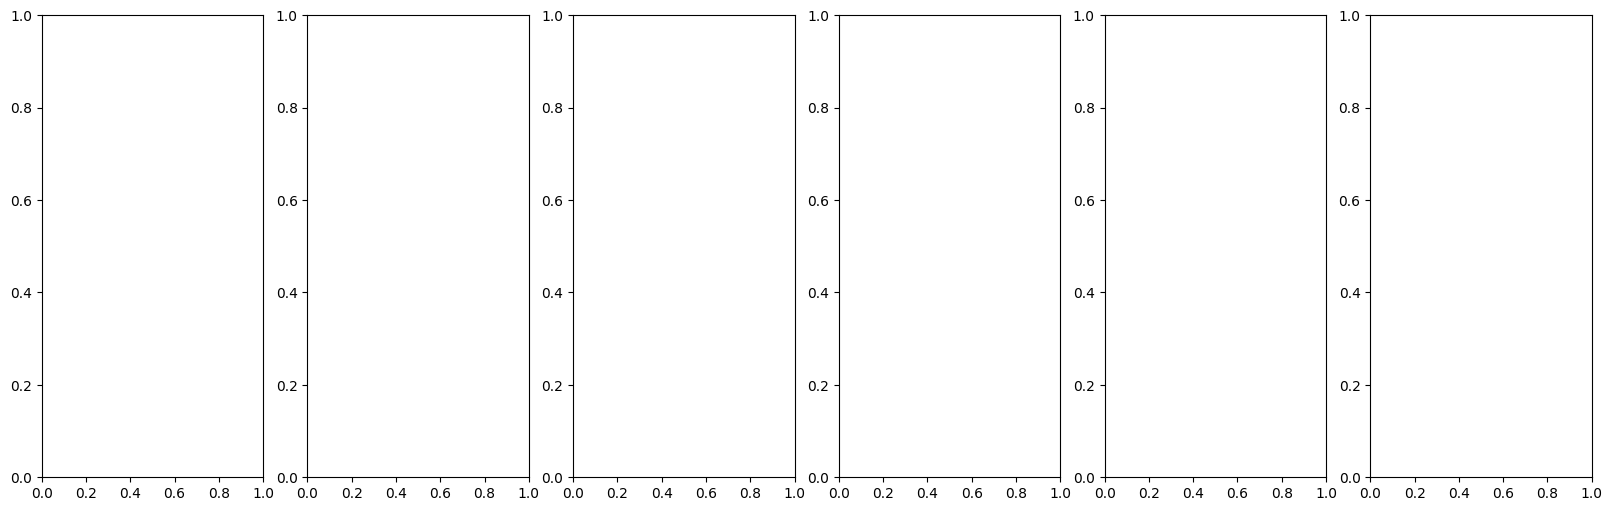

In [15]:
# import matplotlib.pyplot as plt

# # Assuming 'model' is your trained model

# # Function to predict and plot images
# def predict_and_plot(image_path, model, ax):
#     # Load and preprocess the image
#     img = cv2.imread(image_path)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
#     img_resized = cv2.resize(img, (150, 150))
#     img_resized = img_resized / 255.0
#     img_resized = np.expand_dims(img_resized, axis=0)  # Add batch dimension
    
#     # Predict using the model
#     prediction = model.predict(img_resized)
    
#     class_label = np.argmax(prediction)
#     prob_distribution = prediction.squeeze()
#     prob_distribution_str = '\n'.join([f'Class {i}: {prob:.2f}' for i, prob in enumerate(prob_distribution)])
#     # Plot the image with predicted label
#     ax.imshow(img)
#     ax.set_title(f'Predicted Class: {class_label}')
#     ax.axis('off')
#     ax.text(10, 20, f'Prob:\n{prob_distribution_str}', fontsize=20, ha='left', va='top', color='green')



# # List of image paths
# image_paths = ['./test_data/0.jpg', './test_data/1.jpg', './test_data/2.jpg',
#                './test_data/3.jpg', './test_data/4.jpg','./test_data/5.jpg']

# # Create subplots for each image
# fig, axes = plt.subplots(1, 6, figsize=(20, 6))

# # Iterate over each image path and plot
# for i, image_path in enumerate(image_paths):
#     predict_and_plot(image_path, model, axes[i])

# plt.tight_layout()
# plt.show()

import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.models import load_model

# 確保模型已載入
model_path = 'C:/DL_model/best_model.h5'
model = load_model(model_path)

# 確認模型的輸入形狀
input_shape = model.input_shape[1:4]  # 排除批次維度，只取形狀 (height, width, channels)
print(f"Model input shape: {input_shape}")

# 定義預測和繪圖函數
def predict_and_plot(image_path, model, ax):
    # 載入並預處理圖像
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error loading image at {image_path}")
        return
    
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # 將 BGR 轉換為 RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # 將 BGR 轉換為 RGB
    img_resized = cv2.resize(img, (input_shape[1], input_shape[0]))  # 調整大小至模型所需的輸入大小
    img_resized = img_resized / 255.0  # 正規化
    img_resized = np.expand_dims(img_resized, axis=0)  # 增加批次維度
    
    # 使用模型進行預測
    prediction = model.predict(img_resized)
    
    class_label = np.argmax(prediction)  # 獲取預測的類別
    prob_distribution = prediction.squeeze()  # 獲取概率分佈
    prob_distribution_str = '\n'.join([f'Class {i}: {prob:.2f}' for i, prob in enumerate(prob_distribution)])
    
    # 繪製圖像和預測標籤
    ax.imshow(img)
    ax.set_title(f'Predicted Class: {class_label}')
    ax.axis('off')
    ax.text(10, 20, f'Prob:\n{prob_distribution_str}', fontsize=12, ha='left', va='top', color='green')

# 圖像路徑列表
image_paths = ['./test_data/0.jpg', './test_data/1.jpg', './test_data/2.jpg',
               './test_data/3.jpg', './test_data/4.jpg','./test_data/5.jpg']

# 為每個圖像創建子圖
fig, axes = plt.subplots(1, 6, figsize=(20, 6))

# 遍歷每個圖像路徑並繪製
for i, image_path in enumerate(image_paths):
    if i < len(axes):
        predict_and_plot(image_path, model, axes[i])

plt.tight_layout()
plt.show()


In [ ]:
img = cv2.imread('./test_data/square.jpg',cv2.IMREAD_GRAYSCALE)
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img,cv2.IMREAD_GRAYSCALE))
img = cv2.resize(img, (150, 150))
img = img/255.0
img = np.asarray(img).reshape(-1,150, 150,1 )

result = np.argmax(model.predict(img))
print(result)

In [ ]:
img = cv2.imread('./test_data/heart.jpg',cv2.IMREAD_GRAYSCALE)
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img,cv2.IMREAD_GRAYSCALE))
img = cv2.resize(img, (150, 150))
img = img/255.0
img = np.asarray(img).reshape(-1,150, 150,1 )

result = np.argmax(model.predict(img))
print(result)

In [ ]:
img = cv2.imread('./test_data/long.jpg',cv2.IMREAD_GRAYSCALE)
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img,cv2.IMREAD_GRAYSCALE))
img = cv2.resize(img, (150, 150))
img = img/255.0
img = np.asarray(img).reshape(-1,150, 150,1 )

result = np.argmax(model.predict(img))
print(result)

In [ ]:
img = cv2.imread('./test_data/round.jpg',cv2.IMREAD_GRAYSCALE)
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img,cv2.IMREAD_GRAYSCALE))
img = cv2.resize(img, (150, 150))
img = img/255.0
img = np.asarray(img).reshape(-1,150, 150,1 )

result = np.argmax(model.predict(img))
print(result)

In [ ]:
img = cv2.imread('./test_data/trangle.jpg',cv2.IMREAD_GRAYSCALE)
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img,cv2.IMREAD_GRAYSCALE))
img = cv2.resize(img, (150, 150))
img = img/255.0
img = np.asarray(img).reshape(-1,150, 150,1 )

result = np.argmax(model.predict(img))
print(result)

In [ ]:
model.save('model_save/face_classfier_V0.h5')